In [4]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import os

In [5]:
l = os.listdir('/content/drive/MyDrive/masters/fuzzy system/github/data/ultrasound images')[:-1]
#l = os.listdir('/content/drive/MyDrive/masters/fuzzy system/dataset/New folder')[:-1]

In [6]:
def load_img(img_name):
  source = '/content/drive/MyDrive/masters/fuzzy system/github/data/ultrasound images'
  path = source + '/' + str(img_name)
  img = cv2.imread(path,0)
  #cv2_imshow(img)
  return img


In [7]:
def process(img):
  blur = cv2.GaussianBlur(img,(5,5),0)
  blur = np.array(blur, dtype = np.uint8)
  cv2_imshow(blur)
  #gray_im age = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
  equalized = clahe.apply(blur)
  cv2_imshow(equalized)
  #equalized = clahe.apply(blur)
  #binary  = binarize(equalized)
  (unique, counts) = np.unique(equalized, return_counts=True)
  thresh = int(0.22*(unique.max()-unique.min()))
  ret, thresh2 = cv2.threshold(equalized, thresh, 255, cv2.THRESH_BINARY_INV)
  kernel = np.ones((5,5),np.uint8)
  cv2_imshow(thresh2)
  opening = cv2.morphologyEx(thresh2, cv2.MORPH_OPEN, kernel)
  cv2_imshow(opening)
  closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
  cv2_imshow(closing)
  return closing

In [11]:
def save_img(img, img_name):
  destination = '/content/drive/MyDrive/masters/fuzzy system/github/data/preprocesses images'
  cv2.imwrite(destination + '/' + str(img_name), img)

In [13]:
for img_name in l:
  image = load_img(img_name)
  image2 = process(image)
  save_img(image2, img_name)

Output hidden; open in https://colab.research.google.com to view.

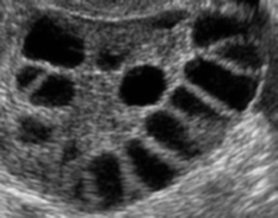

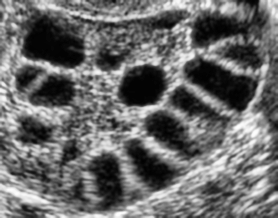

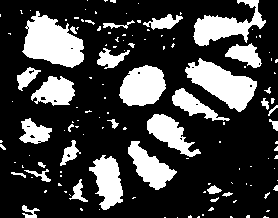

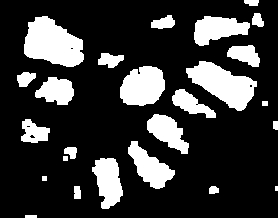

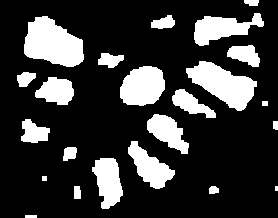

In [10]:
img = load_img('133421baa90112352d90f8f6b5b4dcd7.jpg')
image2 = process(img)
